In [1]:
# Clone the repo

!git clone https://github.com/atikul-islam-sajib/GPCGAN.git

Cloning into 'GPCGAN'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 122 (delta 6), reused 36 (delta 6), pack-reused 86
Receiving objects: 100% (122/122), 121.72 MiB | 19.90 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (44/44), done.


In [2]:
# change the directory
%cd /content/GPCGAN

/content/GPCGAN


In [3]:
%ls

data/        LICENSE  models/   notebooks/  README.md         setup.py
__init__.py  logs/    mypy.ini  outputs/    requirements.txt  src/


#Command Line training

In [4]:
# Train the Conditional GAN
!python /content/GPCGAN/src/cli.py --epochs 30 --batch_size 64 --latent_space 100 --lr 0.0001 --download_mnist

Epoch [1/30] Completed
[==============] Average d_loss: 0.5970 - Average g_loss: 3.4795
Epoch [2/30] Completed
[==============] Average d_loss: 0.4196 - Average g_loss: 4.1632
Epoch [3/30] Completed
[==============] Average d_loss: 0.4883 - Average g_loss: 3.6413
Epoch [4/30] Completed
[==============] Average d_loss: 0.5311 - Average g_loss: 3.2929
Epoch [5/30] Completed
[==============] Average d_loss: 0.5194 - Average g_loss: 3.1560
Epoch [6/30] Completed
[==============] Average d_loss: 0.5235 - Average g_loss: 3.0510
Epoch [7/30] Completed
[==============] Average d_loss: 0.5392 - Average g_loss: 2.9372
Epoch [8/30] Completed
[==============] Average d_loss: 0.5446 - Average g_loss: 2.8480
Epoch [9/30] Completed
[==============] Average d_loss: 0.5526 - Average g_loss: 2.8040
Epoch [10/30] Completed
[==============] Average d_loss: 0.5909 - Average g_loss: 2.6814
Epoch [11/30] Completed
[==============] Average d_loss: 0.6051 - Average g_loss: 2.6014
Epoch [12/30] Completed
[=====

In [6]:
# Test the Generator after being trained
!python /content/GPCGAN/src/cli.py --samples 20 --latent_space 100 --test

Figure(1000x500)
20
tensor([5, 7, 7, 8, 2, 5, 7, 7, 4, 8, 4, 8, 8, 6, 2, 4, 4, 2, 9, 5])


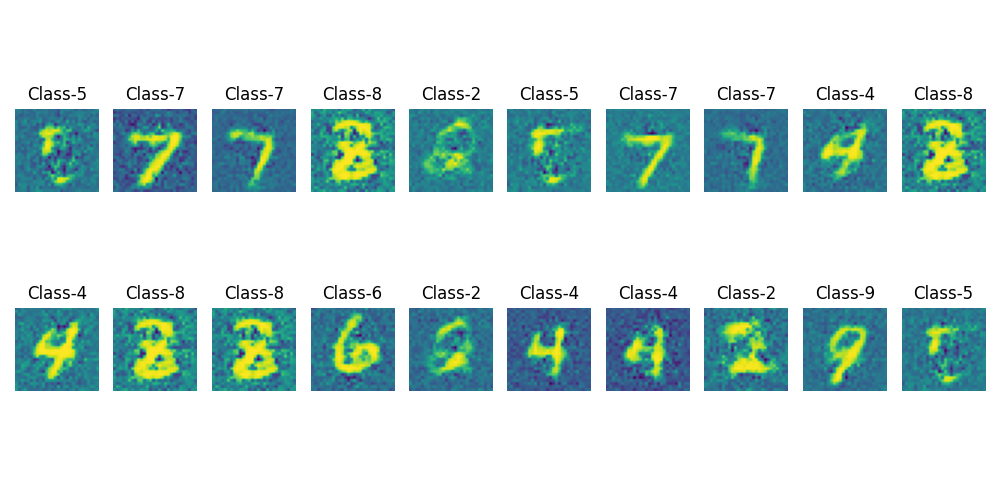

In [7]:
# Display the synthetic data
from IPython.display import Image

Image("/content/GPCGAN/outputs/synthetic_image.png")

#Train with Importing the modules

In [8]:
%ls

data/        LICENSE  models/   notebooks/  README.md         setup.py
__init__.py  logs/    mypy.ini  outputs/    requirements.txt  src/


In [11]:
from src.data_loader import Loader
from src.trainer import Trainer
from src.test import Test

In [13]:
# Load the dataset
loader = Loader(batch_size = 64)
mnist_data = loader.download_mnist()
loader.create_loader(mnist_data = mnist_data)

In [15]:
# Train the CGAN
trainer = Trainer(
    latent_space = 100, epochs = 10, lr = 0.0002)

trainer.train_CGAN()

Epoch [1/10] Completed
[==============] Average d_loss: 0.8295 - Average g_loss: 2.5900
Epoch [2/10] Completed
[==============] Average d_loss: 0.7435 - Average g_loss: 2.5295
Epoch [3/10] Completed
[==============] Average d_loss: 0.7401 - Average g_loss: 2.4121
Epoch [4/10] Completed
[==============] Average d_loss: 0.7747 - Average g_loss: 2.2490
Epoch [5/10] Completed
[==============] Average d_loss: 0.7758 - Average g_loss: 2.2577
Epoch [6/10] Completed
[==============] Average d_loss: 0.7273 - Average g_loss: 2.4073
Epoch [7/10] Completed
[==============] Average d_loss: 0.6902 - Average g_loss: 2.5381
Epoch [8/10] Completed
[==============] Average d_loss: 0.6752 - Average g_loss: 2.5805
Epoch [9/10] Completed
[==============] Average d_loss: 0.6475 - Average g_loss: 2.6585
Epoch [10/10] Completed
[==============] Average d_loss: 0.6112 - Average g_loss: 2.8021


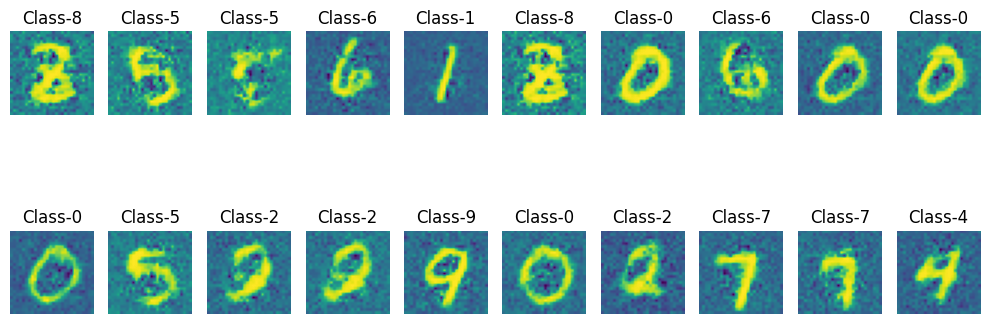

20
tensor([8, 5, 5, 6, 1, 8, 0, 6, 0, 0, 0, 5, 2, 2, 9, 0, 2, 7, 7, 4])


In [16]:
# Test the CGAN model
test = Test(num_samples = 20,
            latent_space = 100)

test.plot_synthetic_image()